In [ ]:
import json 
 
# Opening JSON file
f = open('assets\paris_bounding_polygon.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [ ]:
data[0][0]

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns = ["long","lat"])
df.head()

In [ ]:
df.to_json("kepler_demo.json", orient="records")

In [ ]:
import pandas as pd

# Read the file in chunks of 1000 rows
chunks = pd.read_csv("assets\dataset.csv", chunksize=1000)
for i, chunk in enumerate(chunks):
    # Do something with the chunk
    print(chunk.head())
    print(chunk.shape)
    # stop after reading 5 chunks
    if i == 10:
        break


In [28]:
import pandas as pd

# Read the first 1000 rows of the file
df = pd.read_csv("assets\dataset.csv")


C:\Users\YUNUS\AppData\Local\Temp\ipykernel_24016\1883141678.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("assets\dataset.csv")


In [31]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def fix_data(df):
    # Fix mixed data types
    for col in df.columns:
        try:
            # Check if the column has mixed data types
            if len(df[col].apply(type).value_counts()) > 1:
                # Convert the column to a specific data type
                if df[col].isna().mean() >= 0.5:
                    df[col] = df[col].astype('str')
                else:
                    df[col] = df[col].astype(df[col].apply(type).value_counts().axes[0][0])
        except Exception as e:
            pass
    
    # Fix missing values
    imputer = IterativeImputer(random_state=0)
    for col in df.columns:
        if df[col].dtypes in ['float64', 'int64']:
            df[[col]] = imputer.fit_transform(df[[col]])
    
    return df


In [32]:
df = fix_data(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1083397 non-null  object 
 5   province                           1083397 non-null  object 
 6   city                               1083397 non-null  object 
 7   address                            1083397 non-null  object 
 8   latitude                           1083397 non-null  float64
 9   longitude                          1083397 non-null  float64
 10  claimed                            1083397 non-null  object 
 11  awards                  

In [36]:
df[review_columns]

,excellent,very_good,average,poor,terrible,total_reviews_count,reviews_count_in_default_language
0,2.00000,0.000000,0.000000,0.000000,0.00000,36.0,2.000000
1,2.00000,2.000000,1.000000,0.000000,0.00000,5.0,5.000000
2,3.00000,1.000000,0.000000,0.000000,0.00000,13.0,4.000000
3,1.00000,0.000000,0.000000,0.000000,0.00000,34.0,1.000000
4,4.00000,7.000000,0.000000,0.000000,0.00000,11.0,11.000000
...,...,...,...,...,...,...,...
1083392,0.00000,0.000000,0.000000,0.000000,1.00000,2.0,1.000000
1083393,0.00000,1.000000,1.000000,1.000000,2.00000,6.0,5.000000
1083394,1.00000,0.000000,0.000000,0.000000,1.00000,2.0,2.000000
1083395,24.65344,10.490516,4.109302,2.355306,2.95485,0.0,44.563415


In [39]:
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

correlation_matrix = df[review_columns+rating_columns].corr()


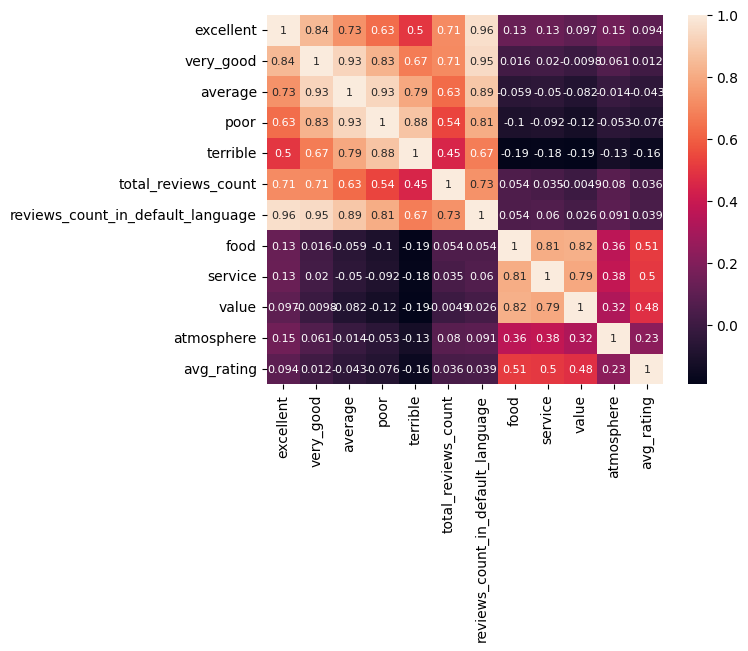

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8})
plt.show()

In [ ]:
df.sample()

In [11]:
for col in df.columns:    
    data_types = df[col].apply(type).value_counts()
    print(data_types)

<class 'str'>    1083397
Name: restaurant_link, dtype: int64
<class 'str'>    1083397
Name: restaurant_name, dtype: int64
<class 'str'>    1083397
Name: original_location, dtype: int64
<class 'str'>    1083397
Name: country, dtype: int64
<class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64
<class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64
<class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64
<class 'str'>    1083397
Name: address, dtype: int64
<class 'float'>    1083397
Name: latitude, dtype: int64
<class 'float'>    1083397
Name: longitude, dtype: int64
<class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64
<class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64
<class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64
<class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, dtype: int64
<class 'str'>

In [10]:
counts = pd.crosstab(df.dtypes, df.columns).T
print(counts)

row_0                              float64  object
col_0                                             
address                                  0       1
atmosphere                               1       0
average                                  1       0
avg_rating                               1       0
awards                                   0       1
city                                     0       1
claimed                                  0       1
country                                  0       1
cuisines                                 0       1
default_language                         0       1
excellent                                1       0
features                                 0       1
food                                     1       0
gluten_free                              0       1
keywords                                 0       1
latitude                                 1       0
longitude                                1       0
meals                          

df.to_json("dataset_demo.json", orient="records")

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c'], 'C': [1.0, 2.0, 3.0]})

# Count the number of rows per data type in each column
counts = pd.crosstab(data.dtypes, data.columns).T
print(counts)